In [4]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')
import numpy as np
import seaborn as sns
from lenskit.datasets import ML100K

In [63]:
syn_lastfm_path = "C:/Users/Jorane Rogier/Documents/studie/year2/Research Internship/RecSysProject/data/lastfm/syn_dense_combined_tau_0.18_impl60_750eps_300bs.csv"
orig_lastfm_path = "C:/Users/Jorane Rogier/Documents/studie/year2/Research Internship/RecSysProject/output/partitioned_mainstreaminess_data/orig_dense_combined_tau_0.18_playcounts_impl60_lastfm_items_removed.csv"

In [65]:
output_name = 'lastfm_tau_0.18_impl60_750eps_300bs'

user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

### Load  preprocess data

In [64]:
# Load original implicit input data
orig_data = pd.read_csv(orig_lastfm_path, sep=',')
orig_data = orig_data[['user', 'item', 'rating']]
orig_data.loc[orig_data.rating > 0, "rating"] = 1
print(orig_data)

        user   item  rating
0          1      2       1
1          1      3       1
2          1      4       1
3          1      5       1
4          1      6       1
...      ...    ...     ...
295929   884  10212       1
295930   884  10224       1
295931   884  10306       1
295932   884  10311       1
295933   884  17324       1

[295934 rows x 3 columns]


In [66]:
def plot_distribution(df_orig, df_syn, class_type, plot_saving_filename):   
    plt.plot(range(len(df_orig)), df_orig['counts'], label='Original', color='blue')
    plt.fill_between(range(len(df_orig)), df_orig['counts'], color='#539ecd', alpha=0.5)

    plt.plot(range(len(df_syn)), df_syn['counts'], label='CTGAN', color='green')
    plt.fill_between(range(len(df_syn)), df_syn['counts'], color='#4cad6e', alpha=0.5)
    plt.legend(loc='upper right')
    
    plt.title(f'Distribution of ratings among {class_type}', size= 20, fontweight='bold')
    plt.xlabel(f'{class_type}', size= 20)#, fontweight='bold')
    plt.ylabel('Number of ratings', size= 20)#, fontweight='bold')
    plt.grid('on')
    #plt.legend(["Beyond-mainstream", "Mainstream"], prop={'size': 18})
    plt.legend(loc='upper right')
    plt.savefig (f"{plot_saving_filename}")
    plt.show()


In [67]:
# load synthetic data
syn_data =  pd.read_csv(syn_lastfm_path, sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]
print(syn_data)

        user   item  rating
0        452     30       1
1        452     34       1
2        452     43       1
3        452     49       1
4        452     50       1
...      ...    ...     ...
419568   451  10311       1
419569   451  10643       1
419570   451  14546       1
419571   451  15526       1
419572   451  17324       1

[419573 rows x 3 columns]


### Rating Distribution

C:\Anaconda\envs\recsys\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


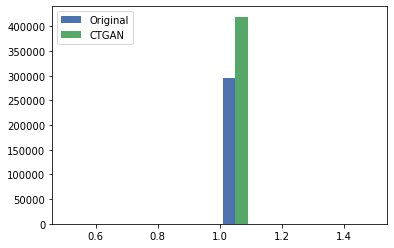

In [68]:
# plot rating distribution
plt.hist([orig_data['rating'], syn_data['rating']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

### Item Distribution

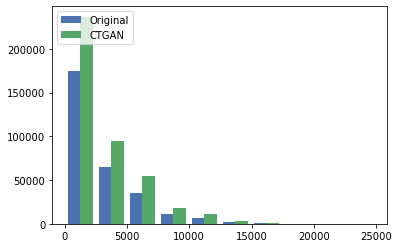

In [69]:
plt.hist([orig_data['item'], syn_data['item']], label=['Original', 'CTGAN'])
plt.legend(loc='upper left')

In [70]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)

df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

### User Distribution

In [71]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

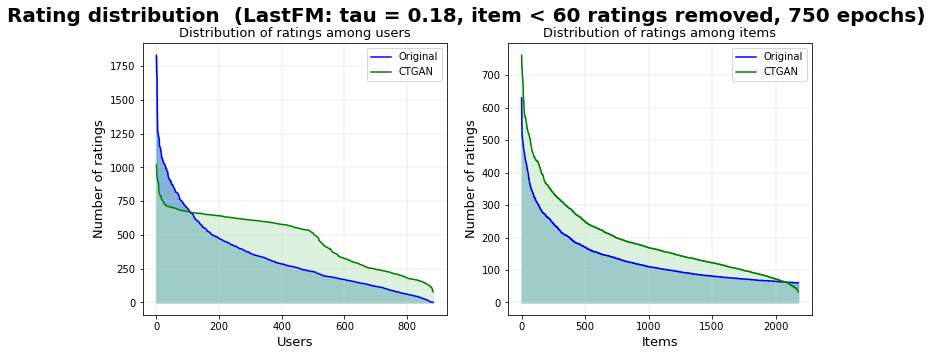

In [72]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution  (LastFM: tau = 0.18, item < 60 ratings removed, 750 epochs)', size=20, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='Original', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_itemstau_0.07_l20_1000eps_300bs.png")

In [59]:
user_plot_saving_filename = f'mainstreaminess_division_user_distribution_{output_name}.png'
item_plot_saving_filename = f'mainstreaminess_division_item_distribution_{output_name}.png'

## Middle-tail sampling

In [76]:
lastfm_path = "C:/Users/Jorane Rogier/Documents/studie/year2/Research Internship/RecSysProject/output/synthetic_data/syn_dense_combined_middle_tail_tau_0.18_impl60_750eps_300bs.csv"

In [77]:
# load synthetic data
syn_data =  pd.read_csv(lastfm_path, sep=',', encoding='latin-1')
syn_data = syn_data[['user', 'item', 'rating']]
print(syn_data)

        user   item  rating
0        452     30       1
1        452     34       1
2        452     43       1
3        452     49       1
4        452     50       1
...      ...    ...     ...
417781   451  10901       1
417782   451  10978       1
417783   451  11289       1
417784   451  13881       1
417785   451  14506       1

[417786 rows x 3 columns]


In [80]:
df_items_orig = orig_data.groupby('item').size().reset_index(name='counts')
df_items_orig = df_items_orig.sort_values(by='counts', ascending=False)

df_items_syn = syn_data.groupby('item').size().reset_index(name='counts')
df_items_syn = df_items_syn.sort_values(by='counts', ascending=False)

In [81]:
df_users_orig = orig_data.groupby('user').size().reset_index(name='counts')
df_users_orig = df_users_orig.sort_values(by='counts', ascending=False)

df_users_syn = syn_data.groupby('user').size().reset_index(name='counts')
df_users_syn = df_users_syn.sort_values(by='counts', ascending=False)

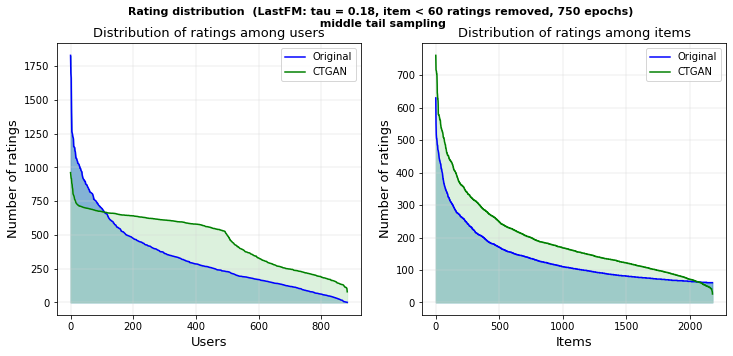

In [85]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
fig.suptitle('Rating distribution  (LastFM: tau = 0.18, item < 60 ratings removed, 750 epochs)\n middle tail sampling', size=11, fontweight='bold')

ax1.grid(linewidth=0.4, color='lightgray')
ax1.plot(range(len(df_users_orig)), df_users_orig['counts'], label='Original', color='blue')
ax1.fill_between(range(len(df_users_orig)), df_users_orig['counts'], color='#0868ac', alpha=0.5)
ax1.plot(range(len(df_users_syn)), df_users_syn['counts'], label='CTGAN', color='green')
ax1.fill_between(range(len(df_users_syn)), df_users_syn['counts'], color='#bae4bc', alpha=0.5)
ax1.grid('on')

ax2.grid(linewidth=0.4, color='lightgray')
ax2.plot(range(len(df_items_orig)), df_items_orig['counts'], label='Original', color='blue')
ax2.fill_between(range(len(df_items_orig)), df_items_orig['counts'], color='#0868ac', alpha=0.5)
ax2.plot(range(len(df_items_syn)), df_items_syn['counts'], label='CTGAN', color='green')
ax2.fill_between(range(len(df_items_syn)), df_items_syn['counts'], color='#bae4bc', alpha=0.5)
ax2.grid('on')

#plt.legend(loc='upper right')
ax1.set_title(f'Distribution of ratings among users', size=13)
ax2.set_title(f'Distribution of ratings among items', size=13)

ax1.set_xlabel('Users', fontsize=13)
ax1.set_ylabel('Number of ratings', fontsize=13)
ax2.set_xlabel('Items', fontsize=13)
ax2.set_ylabel('Number of ratings', fontsize=13)

ax1.legend(loc='upper right')
ax2.legend(loc='upper right')

fig.savefig ("mainsreaminess_distribution_ratings_users_items_middle_tail_tau_0.18_impl60_750eps_300bs.png")